<a href="https://colab.research.google.com/github/AadityaChachra/Linear-Regression-Analysis-on-Socioeconomic-Data/blob/main/LR_Implementation_(2022UCM2303_Aaditya_Chachra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Introduction
"""
Name -: Aaditya Chachra
Roll No. -: 2022UCM2303
Degree -: B.Tech
Branch -: Mathematics and Computing (MAC)

(Implement linear regression at home on colab or python or jupyter notebook)

Linear Regression Analysis on Socioeconomic Data

This project explores the relationship between Literacy Rate (%) and Poverty Rate (%) in India from 1951 to 2011 using Linear Regression.

The datasets were sourced from data.gov.in:
- Literacy Rate https://www.data.gov.in/resource/literacy-rate-1951-2011
- Poverty Rate https://www.data.gov.in/resource/percentage-people-below-poverty-line-india


Key Steps:
1. Data Cleaning: Handled missing values and duplicates to ensure data consistency.
2. Data Merging: Combined the datasets on a common timeline (Year) for analysis.
3. Data Splitting: Split the data into training and testing subsets (80%-20% split).
4. Model Training: Trained a Linear Regression model to predict poverty rates based on literacy rates.
5. Evaluation: Assessed model performance using Mean Squared Error (MSE) and R-squared (R²).
6. Visualization: Used scatter plots and regression lines to visualize the relationship.
7. Future Predictions: Predicted poverty rates for hypothetical literacy rates beyond 2011.

Colab Link-: https://colab.research.google.com/drive/1m-G8zGPUZsHUG_jjO5zyNmNOn34nS2Yl?usp=sharing
"""

In [ ]:
from google.colab import files

# Upload the files
uploaded = files.upload()

# Display the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Saving Literacy_Rate.csv to Literacy_Rate (8).csv
Saving Poverty_Rate.csv to Poverty_Rate (8).csv
Uploaded file: Literacy_Rate (8).csv
Uploaded file: Poverty_Rate (8).csv


In [ ]:
import pandas as pd

# Load the CSV files
literacy_data = pd.read_csv('Literacy_Rate.csv')
poverty_data = pd.read_csv('Poverty_Rate.csv')

# Preview the data
print("Literacy Data:")
print(literacy_data.head())

print("\nPoverty Data:")
print(poverty_data.head())

Literacy Data:
   Year  Persons  Males  Females
0  1951    18.33  27.16     8.86
1  1961    28.30  40.40    15.35
2  1971    34.45  45.96    21.97
3  1981    43.57  56.38    29.76
4  1991    52.21  64.13    39.29

Poverty Data:
   Year  Poverty Rate (%)
0  1951              70.5
1  1961              65.4
2  1971              59.8
3  1981              50.2
4  1991              42.1


In [ ]:
# Merge datasets on 'Year'
merged_data = pd.merge(literacy_data, poverty_data, on='Year')

# Extract Literacy Rate as X and Poverty Rate as Y
X = merged_data['Persons'].values.reshape(-1, 1)  # Literacy Rate (Persons)
Y = merged_data['Poverty Rate (%)'].values  # Poverty Rate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Predict for the full range
X_full_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
Y_full_pred = lr.predict(X_full_range)

# Evaluate the model
mse = mean_squared_error(Y_test, lr.predict(X_test))
r2 = r2_score(Y_test, lr.predict(X_test))

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Intercept (β0): {lr.intercept_}")
print(f"Coefficient (β1): {lr.coef_[0]}")

Mean Squared Error (MSE): 11.828446882221444
R-squared (R²): -0.8190614197956894
Intercept (β0): 93.38968758819342
Coefficient (β1): -0.9835426320262896


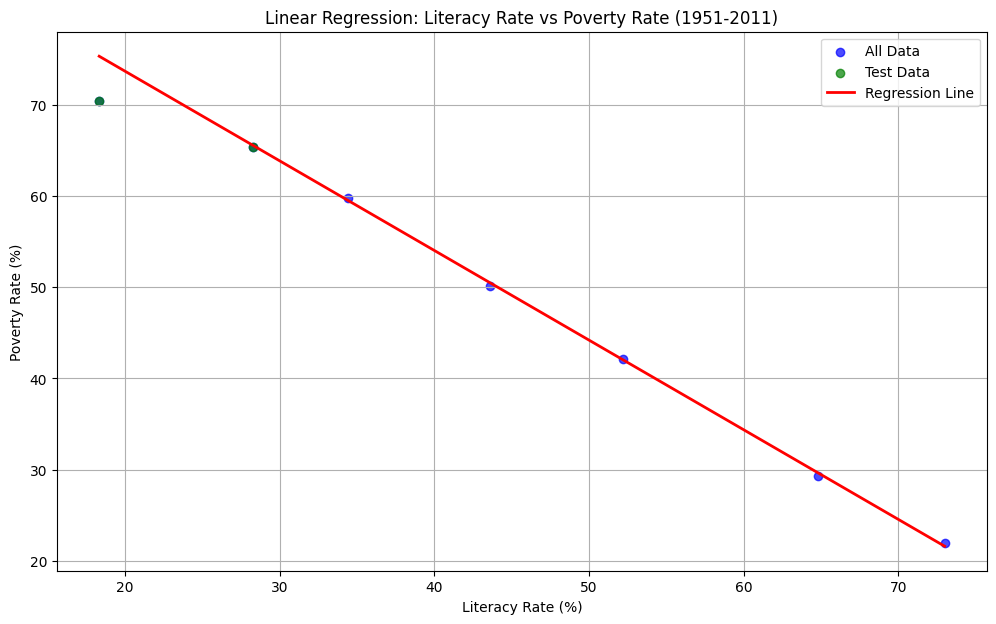

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(X, Y, color='blue', label='All Data', alpha=0.7)
plt.scatter(X_test, Y_test, color='green', label='Test Data', alpha=0.7)
plt.plot(X_full_range, Y_full_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression: Literacy Rate vs Poverty Rate (1951-2011)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Poverty Rate (%)')
plt.legend()
plt.grid()
plt.show()

Predictions for Future Years:
Year	Literacy Rate (%)	Predicted Poverty Rate (%)
2012	75.00		19.62
2013	77.00		17.66
2014	79.00		15.69
2015	81.00		13.72
2016	83.00		11.76
2017	85.00		9.79
2018	87.00		7.82
2019	89.00		5.85
2020	91.00		3.89
2021	93.00		1.92


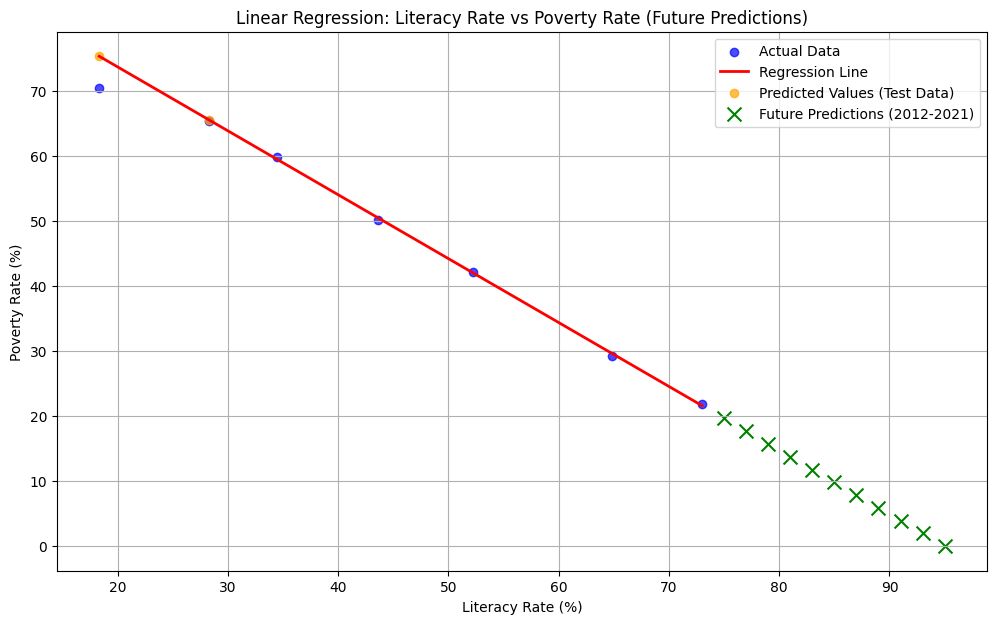

In [ ]:
# Future years and literacy rates (hypothetical values for demonstration)
future_years = np.arange(2012, 2022)  # Years 2012 to 2021
future_literacy_rates = np.array([75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95])  # Hypothetical future literacy rates

# Reshape the future literacy rates for prediction
future_literacy_rates = future_literacy_rates.reshape(-1, 1)

# Predict future poverty rates using the trained model
future_poverty_rates = lr.predict(future_literacy_rates)

# Display predictions
print("Predictions for Future Years:")
print("Year\tLiteracy Rate (%)\tPredicted Poverty Rate (%)")
for year, literacy_rate, poverty_rate in zip(future_years, future_literacy_rates.flatten(), future_poverty_rates):
    print(f"{year}\t{literacy_rate:.2f}\t\t{poverty_rate:.2f}")

# Plotting the original data, regression line, and future predictions
plt.figure(figsize=(12, 7))

# Actual data
plt.scatter(X, Y, color='blue', label='Actual Data', alpha=0.7)

# Regression line
plt.plot(X_full_range, Y_full_pred, color='red', label='Regression Line', linewidth=2)

# Predicted values on the test data
plt.scatter(X_test, lr.predict(X_test), color='orange', label='Predicted Values (Test Data)', alpha=0.7)

# Future predictions
plt.scatter(future_literacy_rates, future_poverty_rates, color='green', label='Future Predictions (2012-2021)', s=100, marker='x')

# Adding titles and labels
plt.title('Linear Regression: Literacy Rate vs Poverty Rate (Future Predictions)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Poverty Rate (%)')

# Display the legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()
